# Final report

## Introduction
There exists huge inequality in the world, whether in gender, race, or income, in our current world. Among all of that, income is one of the most important factors. I want to present data and analysis in this field to raise people's awareness of such a gap, and hopefully, it can remind us how privileged we are. I hope to explore the relationship between educational attainment and personal income in the state of California. My research goal is to identify how is income inequality related to the college completion rate? To compare the income value of different groups with their corresponding college completion status.

I used the [California Educational Attainment and Personal Income as captured by the U.S. Census Current Population Survey](https://data.ca.gov/dataset/ca-educational-attainment-personal-income). It records the year of the survey completed, age of the individual, sex of the individual, level of education completed, income level of the individual, and the number of individuals within the associated category. 

I will specifically focus on the level of education completed and the individual's income level to analyze the relationship between them, which reflects education inequality. Some identify income inequality as an ethical problem, some as an economic problem, which is an ethical consideration I should think about. This dataset is public data that has no restrictions on public use.

## Background or Related Work
Based on the Annual Earnings by Educational Attainment collected by [National Center for Education Statistics](https://nces.ed.gov/programs/coe/indicator/cba), for 25- to 34-year-olds who worked full time, year-round in 2019, higher educational attainment was associated with higher median earnings. This pattern was consistent from 2010 through 2019. For example, in 2019 the median earnings of those with a master’s or higher degree (70,000 dollors) were 26 percent higher than the earnings of those with a bachelor's degre (55,700 dollors), and the median earnings of those with a bachelor’s degree were 59 percent higher than the earnings of those who completed high school (35,000 dollors). 

This indicator examines the annual earnings of 25- to 34-year-olds who worked full time, year round (i.e., worked 35 or more hours per week for 50 or more weeks per year). Many people in this age group recently exited formal education. They may be entering the workforce for the first time or transitioning from part-time to full-time work. In 2020, some 66 percent of 25- to 34-year-olds in the labor force1 worked full time, year round. This percentage was generally higher for those with higher levels of educational attainment. Levels of educational attainment refer to the highest levels of education attained. For example, 73 percent of labor force participants with a bachelor’s degree worked full time, year round in 2020, compared with 60 percent of those who completed high school2 in this age group.

U.S. citizens with a professional degree had the highest median household income in 2020, at 151,560 U.S. dollars. In comparison, those with less than a 9th grade education made significantly less money, at 29,609 U.S. dollars. Published by [Statista Research Department](https://www.statista.com/aboutus/our-research-commitment), Oct 28, 2021 



## Research questions
Before I started this project, I made an assumption that the more annual salary you get, the higher your educational attainment you have. I want to explore people's educational attainment from different personal income groups in California. In this case, to present data and analysis in the field of education inequality to raise people's awareness of some huge gaps that might still exist even though we have come a long way. 
To better guide my research I made two research questions:
1. What is the impact of an advanced degree on people in California over the course of their annual salary?
2. In specific personal income level, what level of educational attainment accounts for the largest proportion? 


## Methodology
I planned to use ordinary least squares estimating coefficients of linear regression equations, which describe the relationship between the annual salary for residents in California and their educational attainment. However, this did not work out since all my data are in intervals, so it can not apply to ordinary least squares. In this case, I used a scatter plot to show income distributions based on different educational attainment.

Also, as what I planned, I presented data in the bar chart to show the demographics of the data. I did not choose the line chart to show the increment or decrement of the salary or population change in the annual salary of residents in California since the increment does not related to my research question. To display the relationship between personal income and educational attainment, I can show the demographics of the data in a bar chart to better visualize it. 

Bar charts are a fundamental visualization for comparing values between groups of data. A bar chart shows the frequency counts of educational attainment for the different personal income levels for residents in California. 

## Findings
In the sections below, I provide all the code I used to scrape data from the websites California open data portal as sources as well as some others I use to analyze the data. The goal here is to attempt to explore the relationship between educational attainment and personal income for residents in California. 


### 1. What are the data?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
name = 'ca-educational-attainment-personal-income-2008-2014.csv'
dd = pd.read_csv(name)

Educational attainment and personal income data taken from U.S. Census Current Population Survey (CPS) in CA open data portal: https://data.ca.gov/dataset/ca-educational-attainment-personal-income

### 2. What are the variables?
The dataset has six variables, which are Year, Age, Gender, Educational Attainment, Personal Income, and Population Count. To achieve my research question, the relationship between personal income and educational attainment, I only focus on the column of Personal Income, Educational Attainment, and Population Count. 

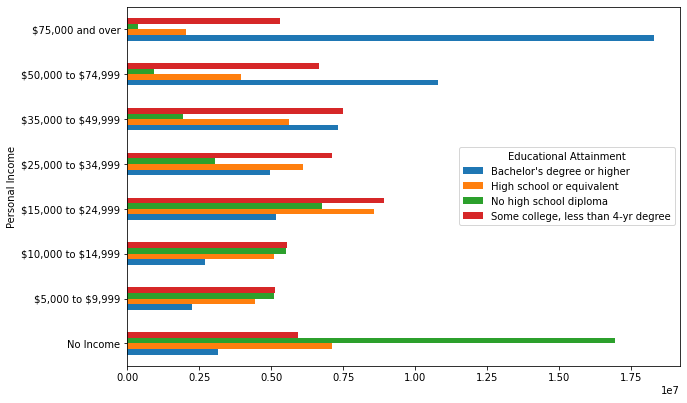

In [10]:
newD = dd[['Educational Attainment', 'Personal Income', 'Population Count']]
newD = newD.dropna()
tmpD = newD.groupby([ 'Personal Income','Educational Attainment']).sum()['Population Count']
tmpD = tmpD.unstack().fillna(0)
tmpD= tmpD.reset_index()
tmpD['x'] = [2,3,4,5,1,6,7,0]
tmpD = tmpD.sort_values('x')
tmpD.plot('Personal Income',[ 1,2,3,4],kind = 'barh',figsize=(10,6))
plt.tight_layout(  rect=[0.05,0.05,1,1])
yt = plt.yticks( )
plt.yticks(yt[0], tmpD['Personal Income'].map(lambda x:x.replace('$',r'\$')))
plt.show()

The bar chart visualizes the demographics of residents in California with different personal income intervals from no income to 75000 dollars and over in different educational attainment. The educational attainment is shown in different colors to visualize the population with the bar length better. 

As we can see from the graph, educational attainment with no high school diploma accounts for the largest population in the no income category, and a bachelor's degree or higher accounts for the least. In the 75000 dollars and over category, which is the highest personal income interval, educational attainment with a bachelor's degree or higher accounts for the largest population, and no high school diploma accounts for the least. This bar chart answers the second research question: In specific personal income level, what level of educational attainment accounts for the largest proportion? 

From this bar graph and analysis, we can summarize the first finding:

**Higher personal income level accounts by more people with higher educational attainment, bachelor's degree or higher.**

([<matplotlib.axis.YTick at 0x7fbeb253a1f0>,
 [Text(0, 0, 'No Income'),
  Text(0, 1, '\\$5,000 to \\$9,999'),
  Text(0, 2, '\\$10,000 to \\$14,999'),
  Text(0, 3, '\\$15,000 to \\$24,999'),
  Text(0, 4, '\\$25,000 to \\$34,999'),
  Text(0, 5, '\\$35,000 to \\$49,999'),
  Text(0, 6, '\\$50,000 to \\$74,999'),
  Text(0, 7, '\\$75,000 and over')])

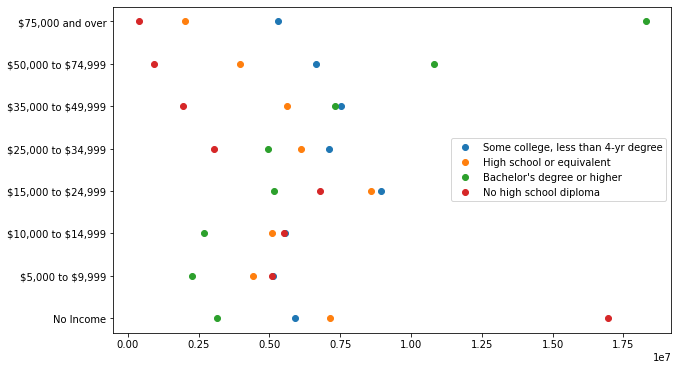

In [12]:
tt = newD.groupby([ 'Personal Income','Educational Attainment']).sum()['Population Count']
tt = tt.reset_index()
ll = {e[0]:e[1] for e in zip(tt['Personal Income'].unique(),  [2,3,4,5,1,6,7,0])}
tt['x'] = tt['Personal Income'].map(ll)
tt = tt.sort_values('x')
plt.figure(figsize=(10,6))
for wh in tt['Educational Attainment'].unique():
    one = tt.loc[tt['Educational Attainment'] == wh]
    #plt.scatter( one['Population Count'],one['x'],    label=wh)
    plt.plot( one['Population Count'],one['Personal Income'], 'o',   label=wh)
plt.legend()
lb = plt.yticks()
plt.yticks(yt[0], tmpD['Personal Income'].map(lambda x:x.replace('$',r'\$')))

The scatter plot visualizes the relationship between two quantitative variables, personal income and educational attainment. The variables are California residents with different personal income intervals from no income to 75000 dollars and over and different levels of educational attainment. The educational attainment is shown in different colors to visualize the distribution of the population at different income intervals. 

As we can see from the graph, educational attainment with a bachelor's degree or higher, represented by the green dots, gets more and more to the right as the personal income increases. This means with an advanced degree, a bachelor's degree or higher, residents in California have a higher chance of being in the interval of high personal income. 
However, educational attainment with a no high school diploma, represented by the red dots, gets more and more to the left as the personal income increases. This means with no high school diploma, residents in California are more likely to be in the interval of no income. This bar chart answers the first research question: What is the impact of an advanced degree on people in California over the course of their annual salary?

From this scatter plot graph and analysis, we can summarize the second finding:

**With an advanced degree, bachelor's degree or higher, residents in California are the most people within the highest personal income group, 75000 dollars or higher.**

# Conclusion
Throughout the project, I found that there exists huge inequality between personal income and educational attainment in California. High-income people tend to have higher education levels/attainment, and most of them have completed at least Bachelor's degree or higher. Conversely, the lower the income, the less people without a bachelor's degree, and they tend to drop out of high school.

The extreme values all show extreme levels of education, and there is a huge difference between people with no income and people with high incomes. A specific financial subsidy is needed to reduce such a huge difference. We should be aware of how privileged we are for going to college and try our best to help others. 